# CAR PRICE PREDICTION

Problem Statement:

A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

In [1]:

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
import seaborn as sns

In [2]:
cars = pd.read_csv("CarPrice_Assignment.csv")
type(cars)

pandas.core.frame.DataFrame

In [3]:

cars.head(5)

car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          front       88.6  ...         130   
1  convertible        rwd          front       88.6  ...         130   
2    hatchback        rwd          front       94.5  ...         152   
3        sedan        fwd          front       99.8  ...         109   
4        sedan        4wd          front       99.4  ...         136   

   fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm citympg  \
0        mpfi       3.47    2.68              9.0        111     5000      21   
1        mpfi       3.47    2.68              9.0        111     5000      21   
2        mpfi       2.68    3.47              9.0        154     5000      19   
3        mpfi       3.19    3.40             10.0        102     5500      24   
4        mpfi       3.19    3.40              8.0        115     5500      18   

   highwaympg    price  
0          27  13495.0  
1          27  16500.0  
2          26  16500.0  
3          30  13950.0  
4          22  17450.0  

[5 rows x 26 columns]

In [4]:
cars[cars["horsepower"]>250]

car_ID  symboling          CarName fueltype aspiration doornumber  \
49       50          0        jaguar xk      gas        std        two   
129     130          1  porsche cayenne      gas        std        two   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
49       sedan        rwd          front      102.0  ...         326   
129  hatchback        rwd          front       98.4  ...         203   

     fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm  \
49         mpfi       3.54    2.76             11.5        262     5000   
129        mpfi       3.94    3.11             10.0        288     5750   

    citympg  highwaympg    price  
49       13          17  36000.0  
129      17          28  31400.5  

[2 rows x 26 columns]

In [5]:

 cars.describe()


car_ID   symboling   wheelbase   carlength    carwidth   carheight  \
count  205.000000  205.000000  205.000000  205.000000  205.000000  205.000000   
mean   103.000000    0.834146   98.756585  174.049268   65.907805   53.724878   
std     59.322565    1.245307    6.021776   12.337289    2.145204    2.443522   
min      1.000000   -2.000000   86.600000  141.100000   60.300000   47.800000   
25%     52.000000    0.000000   94.500000  166.300000   64.100000   52.000000   
50%    103.000000    1.000000   97.000000  173.200000   65.500000   54.100000   
75%    154.000000    2.000000  102.400000  183.100000   66.900000   55.500000   
max    205.000000    3.000000  120.900000  208.100000   72.300000   59.800000   

        curbweight  enginesize   boreratio      stroke  compressionratio  \
count   205.000000  205.000000  205.000000  205.000000        205.000000   
mean   2555.565854  126.907317    3.329756    3.255415         10.142537   
std     520.680204   41.642693    0.270844    0.313597          3.972040   
min    1488.000000   61.000000    2.540000    2.070000          7.000000   
25%    2145.000000   97.000000    3.150000    3.110000          8.600000   
50%    2414.000000  120.000000    3.310000    3.290000          9.000000   
75%    2935.000000  141.000000    3.580000    3.410000          9.400000   
max    4066.000000  326.000000    3.940000    4.170000         23.000000   

       horsepower      peakrpm     citympg  highwaympg         price  
count  205.000000   205.000000  205.000000  205.000000    205.000000  
mean   104.117073  5125.121951   25.219512   30.751220  13276.710571  
std     39.544167   476.985643    6.542142    6.886443   7988.852332  
min     48.000000  4150.000000   13.000000   16.000000   5118.000000  
25%     70.000000  4800.000000   19.000000   25.000000   7788.000000  
50%     95.000000  5200.000000   24.000000   30.000000  10295.000000  
75%    116.000000  5500.000000   30.000000   34.000000  16503.000000  
max    288.000000  6600.000000   49.000000   54.000000  45400.000000

In [6]:
# show info of data set

info = cars.info()
print(info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

Data Cleaning and Preparation

In [7]:
CompanyName = cars['CarName'].apply(lambda x : x.split(' ')[0])
cars.insert(3,"CompanyName",CompanyName)
cars.drop(['CarName'],axis=1,inplace=True)
cars.head()

car_ID  symboling  CompanyName fueltype aspiration doornumber      carbody  \
0       1          3  alfa-romero      gas        std        two  convertible   
1       2          3  alfa-romero      gas        std        two  convertible   
2       3          1  alfa-romero      gas        std        two    hatchback   
3       4          2         audi      gas        std       four        sedan   
4       5          2         audi      gas        std       four        sedan   

  drivewheel enginelocation  wheelbase  ...  enginesize  fuelsystem  \
0        rwd          front       88.6  ...         130        mpfi   
1        rwd          front       88.6  ...         130        mpfi   
2        rwd          front       94.5  ...         152        mpfi   
3        fwd          front       99.8  ...         109        mpfi   
4        4wd          front       99.4  ...         136        mpfi   

   boreratio  stroke compressionratio horsepower  peakrpm citympg  highwaympg  \
0       3.47    2.68              9.0        111     5000      21          27   
1       3.47    2.68              9.0        111     5000      21          27   
2       2.68    3.47              9.0        154     5000      19          26   
3       3.19    3.40             10.0        102     5500      24          30   
4       3.19    3.40              8.0        115     5500      18          22   

     price  
0  13495.0  
1  16500.0  
2  16500.0  
3  13950.0  
4  17450.0  

[5 rows x 26 columns]

In [8]:
cars["CompanyName"].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

There seems to be some spelling error in the CompanyName column.

maxda = mazda

Nissan = nissan

porsche = porcshce.

toyota = toyouta

vokswagen = volkswagen = vw

In [9]:


def replace_name(a,b):
    cars["CompanyName"].replace(a,b,inplace=True)

replace_name('maxda','mazda')
replace_name('porcshce','porsche')
replace_name('toyouta','toyota')
replace_name('vokswagen','volkswagen')
replace_name('vw','volkswagen')

cars.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche', 'renault',
       'saab', 'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [10]:
cars.duplicated().sum()

0

In [11]:
cars.columns

Index(['car_ID', 'symboling', 'CompanyName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

Visualizing the data

C:\Users\vighn\AppData\Local\Temp\ipykernel_11552\4195411824.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cars.price)


<Axes: title={'center': 'Car Price Distribution Plot'}, xlabel='price', ylabel='Density'>

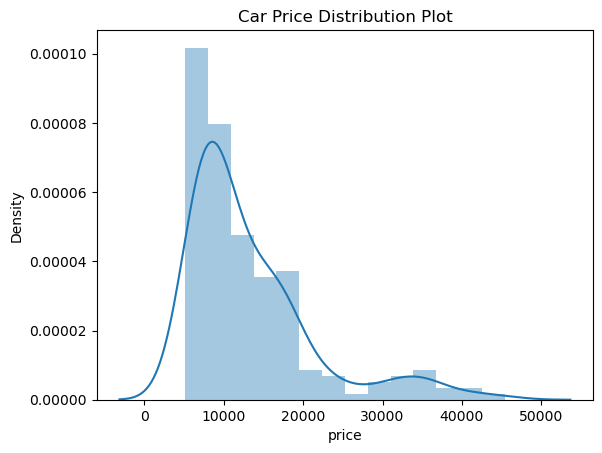

In [12]:

plt.title('Car Price Distribution Plot')
sns.distplot(cars.price)

In [13]:
cars["price"].describe()

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64

1].The plot seemed to be right-skewed, meaning that the most prices in the dataset are low(Below 15,000).

2].There is a significant difference between the mean and the median of the price distribution.

3].The data points are far spread out from the mean, which indicates a high variance in the car prices.

In [14]:
import plotly.express as px
horse_power = cars.horsepower.values
sales_price = cars.price.values

fig = px.scatter(x=horse_power, y=sales_price, labels={'x': 'Horsepower', 'y': 'Sales Price'},
                 title='Horsepower vs Sales Price')
fig.show()
#using the plotly for the Interactive Visualizations

In [15]:
x=cars["CompanyName"].value_counts()
x

CompanyName
toyota         32
mazda          17
nissan         17
mitsubishi     13
honda          13
volkswagen     12
subaru         12
peugeot        11
volvo          11
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
porsche         5
isuzu           4
jaguar          3
chevrolet       3
alfa-romero     3
renault         2
mercury         1
Nissan          1
Name: count, dtype: int64

Visualising Categorical Data

In [16]:
fig = px.bar(cars["CompanyName"].value_counts(), x=cars["CompanyName"].value_counts().index, y=cars["CompanyName"].value_counts(),
             labels={'x': 'Car Company', 'y': 'Frequency'}, title='Frequency of Car Companies')
fig.show()
#this graph shows popularity of the cars

In [17]:
fig = px.bar( x=cars["fueltype"].value_counts().index, y=cars["fueltype"].value_counts(),width=400,
             labels={'x': 'Fuel Type', 'y': 'Frequency'}, title='Frequency of Fuel Types')
fig.show()
#this shows us that gas cars are in demand in the market 

In [18]:
fig = px.bar( x=cars["carbody"].value_counts().index, y=cars["carbody"].value_counts(),width=500,
             labels={'x': "Car Type", 'y': 'Frequency of Car type'}, title='Car Type Histogram')
fig.show()

Inference :

1].Toyota seemed to be favored car company.

2].Number of gas fueled cars are more than diesel.

3].sedan is the top car type prefered.

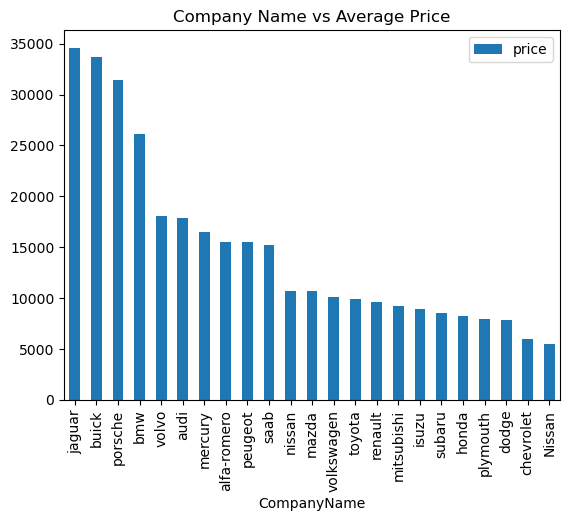

In [19]:

df = pd.DataFrame(cars.groupby(['CompanyName'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Company Name vs Average Price')
plt.show()



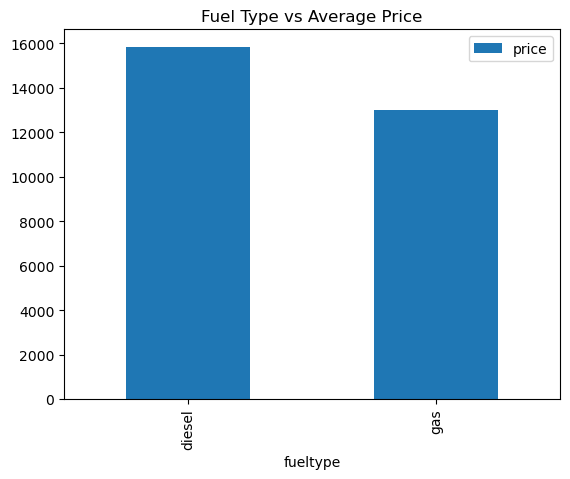

In [20]:
df = pd.DataFrame(cars.groupby(['fueltype'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Fuel Type vs Average Price')
plt.show()



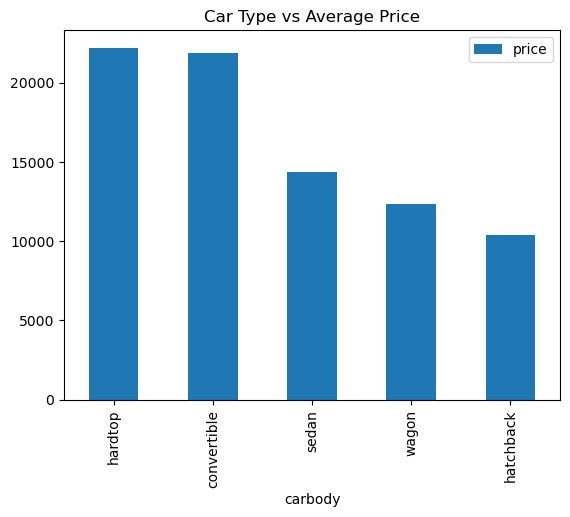

In [21]:
df = pd.DataFrame(cars.groupby(['carbody'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Car Type vs Average Price')
plt.show()

Inference :

1].Jaguar and Buick seem to have highest average price.

2].diesel has higher average price than gas.

3].hardtop and convertible have higher average price.

<Figure size 2500x600 with 0 Axes>

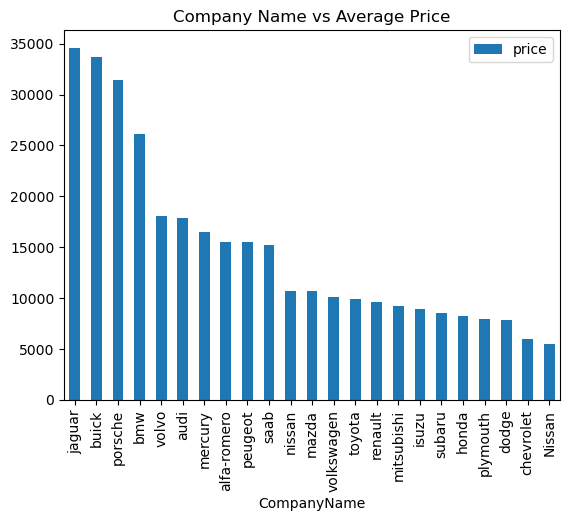

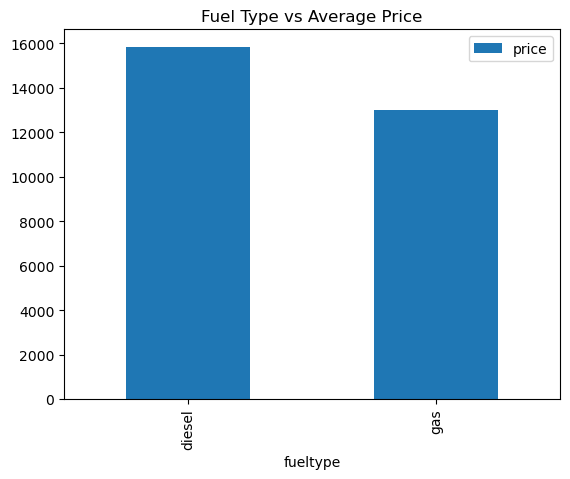

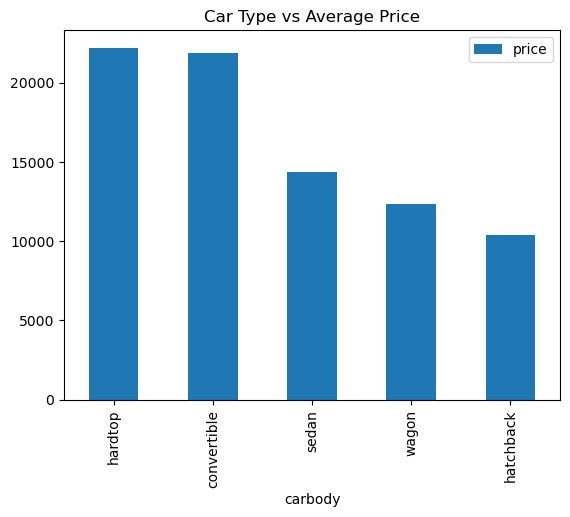

In [22]:
plt.figure(figsize=(25, 6))

df = pd.DataFrame(cars.groupby(['CompanyName'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Company Name vs Average Price')
plt.show()

df = pd.DataFrame(cars.groupby(['fueltype'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Fuel Type vs Average Price')
plt.show()

df = pd.DataFrame(cars.groupby(['carbody'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Car Type vs Average Price')
plt.show()

Inference :

1].Jaguar and Buick seem to have highest average price.

2].diesel has higher average price than gas.

3].hardtop and convertible have higher average price.


In [23]:
fig = px.bar( x=cars["aspiration"].value_counts().index, y=cars["aspiration"].value_counts(),width=500,
             labels={'x': "Car Type", 'y': 'Frequency of Car type'}, title='')
fig.show()

In [24]:
fig = px.bar( x=cars["doornumber"].value_counts().index, y=cars["doornumber"].value_counts(),width=500,
             labels={'x': "doornumber", 'y': 'Frequency of doornumber'}, title='Door Number Histogram')
fig.show()

 Visualising numerical data

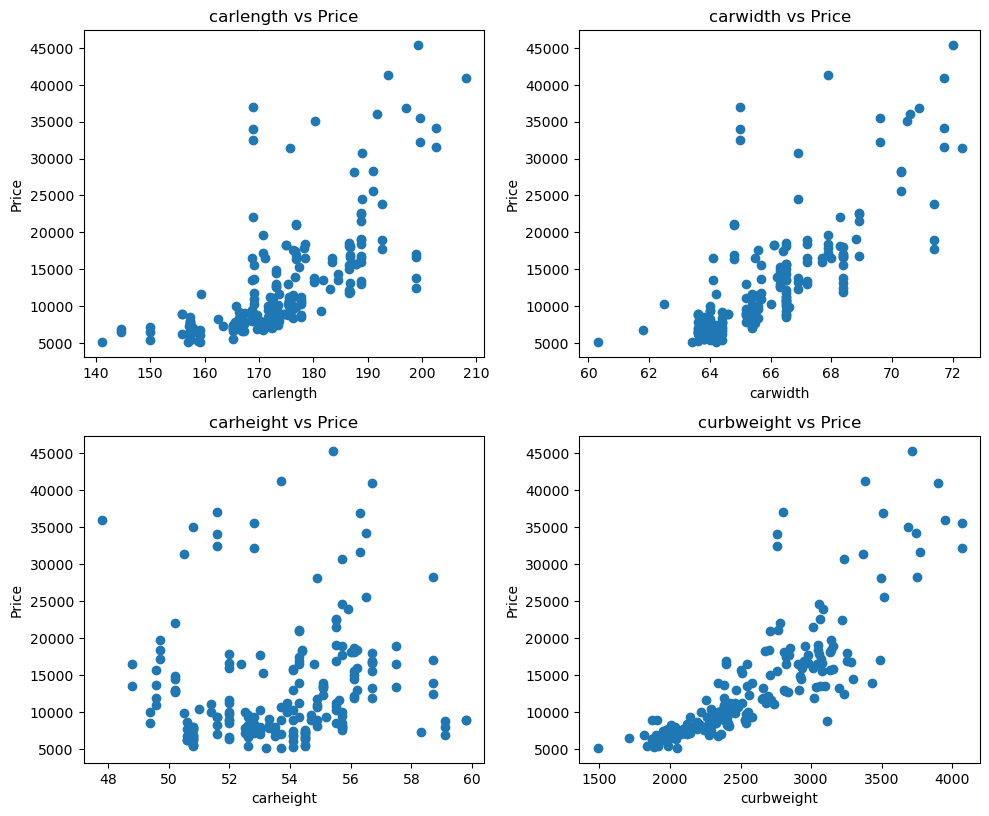

In [30]:
def scatter(x,fig):
    plt.subplot(5,2,fig)
    plt.scatter(cars[x],cars['price'])
    plt.title(x+' vs Price')
    plt.ylabel('Price')
    plt.xlabel(x)

plt.figure(figsize=(10,20))

scatter('carlength', 1)
scatter('carwidth', 2)
scatter('carheight', 3)
scatter('curbweight', 4)

plt.tight_layout()

Inference :

1]carwidth, carlength and curbweight seems to have a poitive correlation with price.

2]carheight doesn't show any significant trend with price.

C:\Users\vighn\anaconda3\Lib\site-packages\seaborn\axisgrid.py:2095: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.

C:\Users\vighn\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



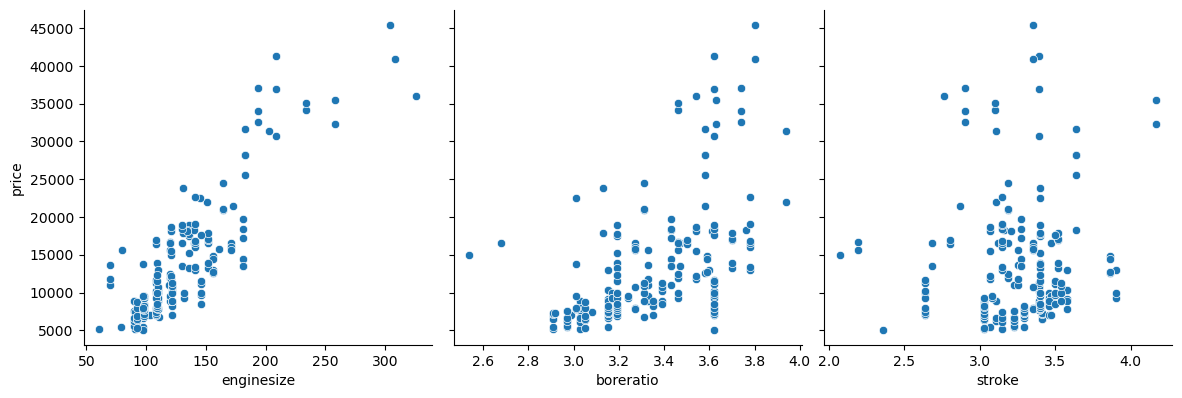

C:\Users\vighn\anaconda3\Lib\site-packages\seaborn\axisgrid.py:2095: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.

C:\Users\vighn\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



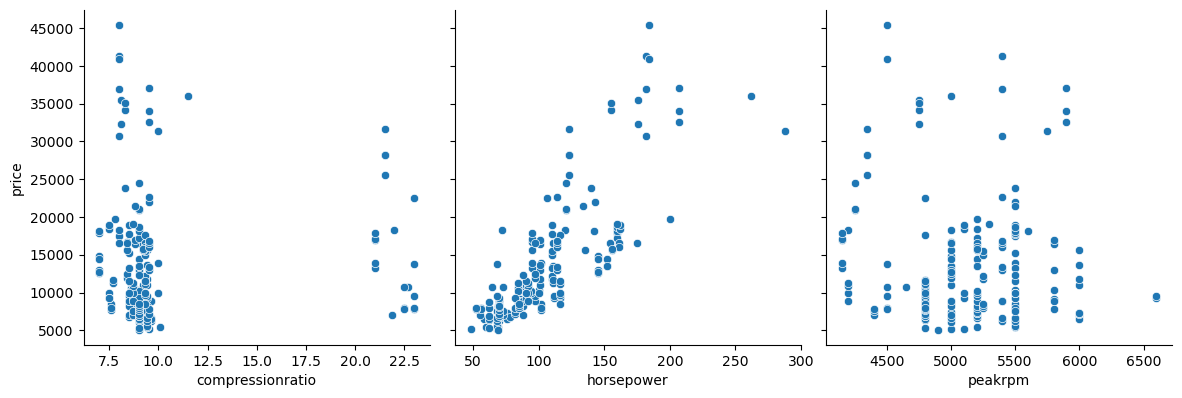

C:\Users\vighn\anaconda3\Lib\site-packages\seaborn\axisgrid.py:2095: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.

C:\Users\vighn\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



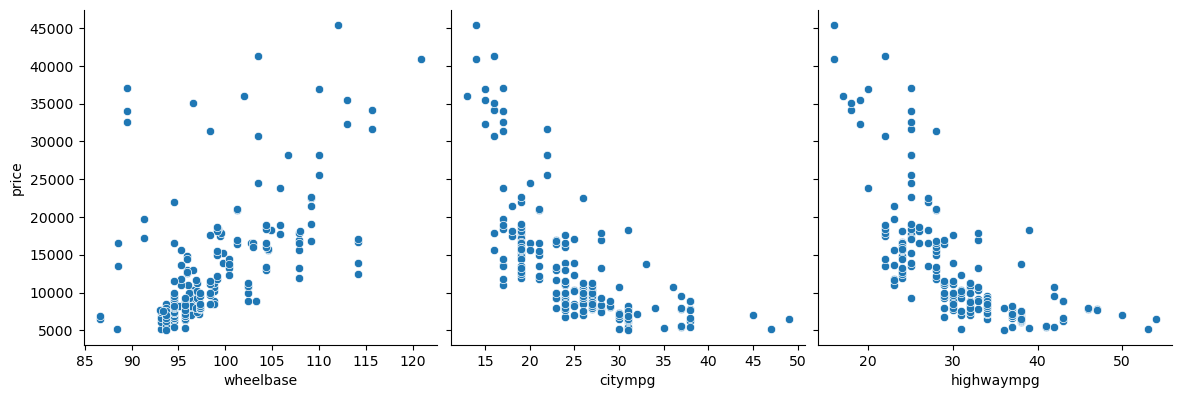

In [31]:
def pp(x,y,z):
    sns.pairplot(cars, x_vars=[x,y,z], y_vars='price',size=4, aspect=1, kind='scatter')
    plt.show()

pp('enginesize', 'boreratio', 'stroke')
pp('compressionratio', 'horsepower', 'peakrpm')
pp('wheelbase', 'citympg', 'highwaympg')

Inference :

1]enginesize, boreratio, horsepower, wheelbase - seem to have a significant positive correlation with price.

2]citympg, highwaympg - seem to have a significant negative correlation with price.

In [33]:
np.corrcoef(cars['carlength'], cars['carwidth'])[0, 1]
#this shows that the correlation in between the carlength and carwidth

0.841118268481846

In [48]:
cars_lr = cars[['price', 'fueltype', 'aspiration','carbody', 'drivewheel','wheelbase',
                  'curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'boreratio','horsepower'
                    , 'carlength','carwidth']]
cars_lr.head()

price fueltype aspiration      carbody drivewheel  wheelbase  curbweight  \
0  13495.0      gas        std  convertible        rwd       88.6        2548   
1  16500.0      gas        std  convertible        rwd       88.6        2548   
2  16500.0      gas        std    hatchback        rwd       94.5        2823   
3  13950.0      gas        std        sedan        fwd       99.8        2337   
4  17450.0      gas        std        sedan        4wd       99.4        2824   

  enginetype cylindernumber  enginesize  boreratio  horsepower  carlength  \
0       dohc           four         130       3.47         111      168.8   
1       dohc           four         130       3.47         111      168.8   
2       ohcv            six         152       2.68         154      171.2   
3        ohc           four         109       3.19         102      176.6   
4        ohc           five         136       3.19         115      176.6   

   carwidth  
0      64.1  
1      64.1  
2      65.5  
3      66.2  
4      66.4

In [54]:
cars_lr.shape

(205, 28)

In [57]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train, df_test = train_test_split(cars_lr, train_size = 0.7, test_size = 0.3, random_state = 100)

In [59]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
num_vars = ['wheelbase', 'curbweight', 'enginesize', 'boreratio', 'horsepower','carlength','carwidth','price']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [60]:
df_train.head()

price  wheelbase  curbweight  enginesize  boreratio  horsepower  \
122  0.068818   0.244828    0.272692    0.139623   0.230159    0.083333   
125  0.466890   0.272414    0.500388    0.339623   1.000000    0.395833   
166  0.122110   0.272414    0.314973    0.139623   0.444444    0.266667   
1    0.314446   0.068966    0.411171    0.260377   0.626984    0.262500   
199  0.382131   0.610345    0.647401    0.260377   0.746032    0.475000   

     carlength  carwidth   gas  turbo  ...    ohc   ohcf   ohcv  rotor   five  \
122   0.426016  0.291667  True  False  ...   True  False  False  False  False   
125   0.452033  0.666667  True  False  ...   True  False  False  False  False   
166   0.448780  0.308333  True  False  ...  False  False  False  False  False   
1     0.450407  0.316667  True  False  ...  False  False  False  False  False   
199   0.775610  0.575000  True   True  ...   True  False  False  False  False   

     four    six  three  twelve    two  
122  True  False  False   False  False  
125  True  False  False   False  False  
166  True  False  False   False  False  
1    True  False  False   False  False  
199  True  False  False   False  False  

[5 rows x 28 columns]

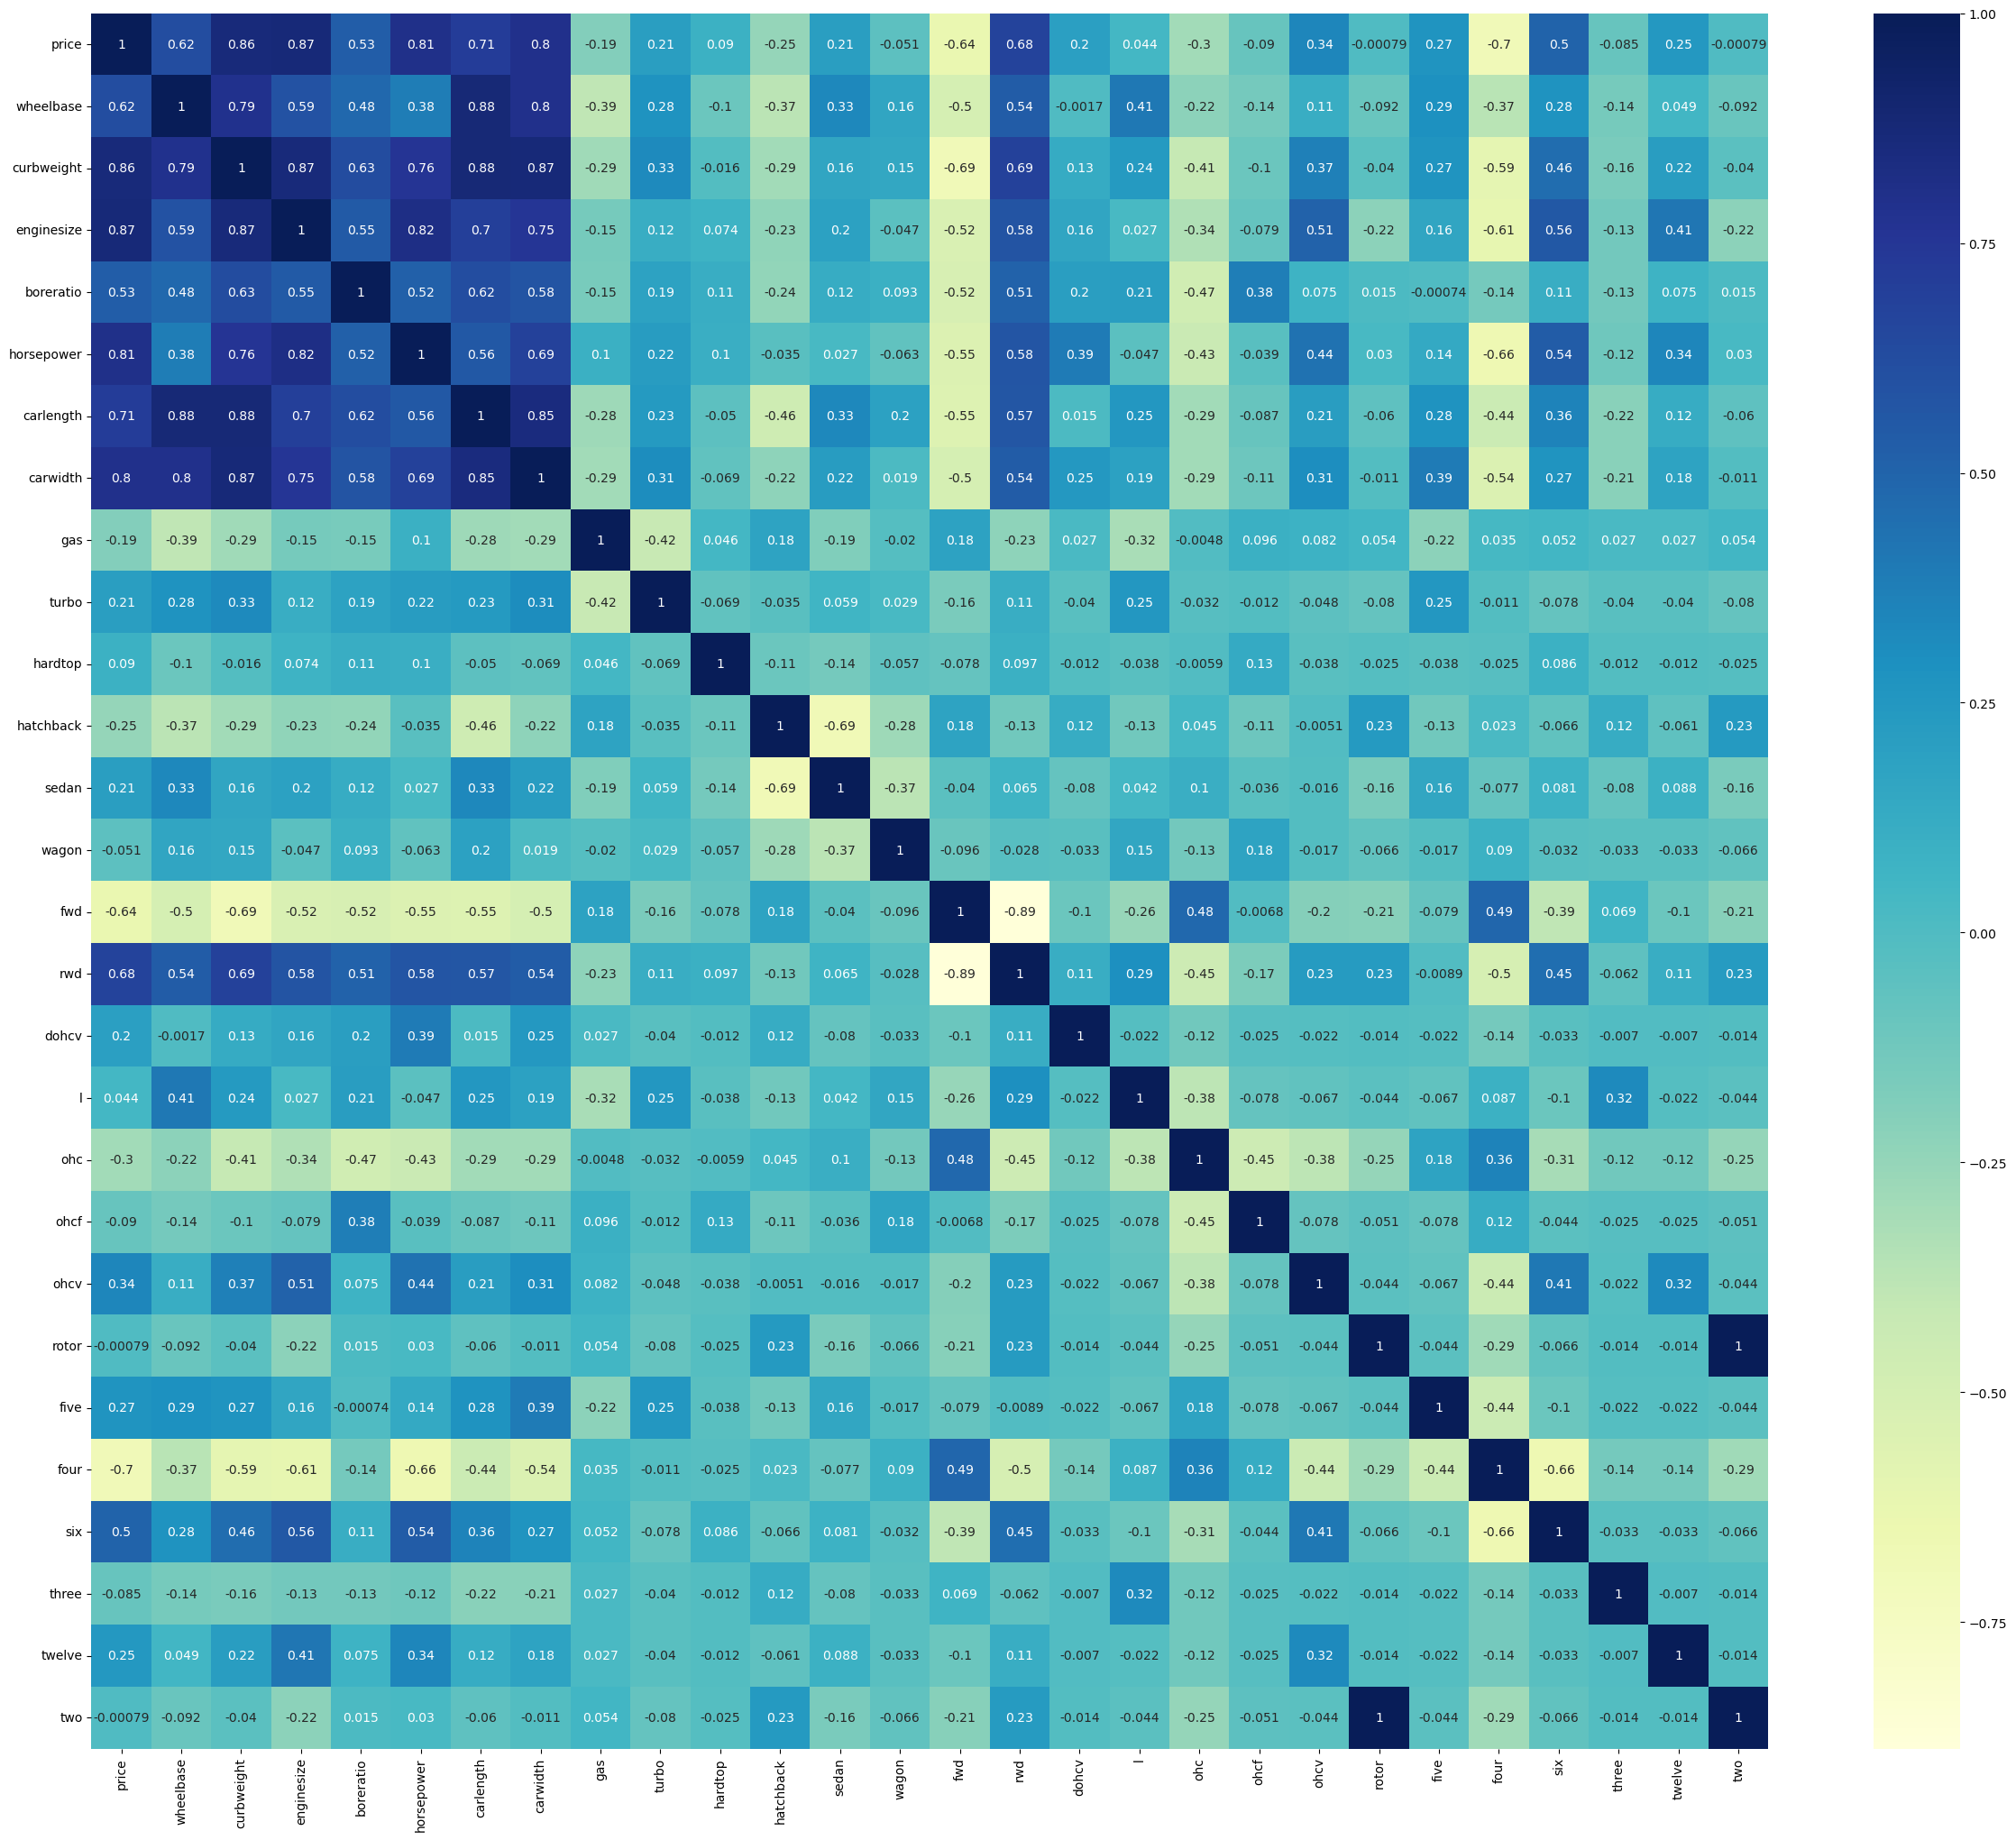

In [62]:
#Correlation using heatmap
plt.figure(figsize = (30, 25))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [63]:
#Dividing data into X and y variables
y_train = df_train.pop('price')
X_train = df_train

In [89]:
num_vars = ['wheelbase', 'curbweight', 'enginesize', 'boreratio', 'horsepower','carlength','carwidth','price']
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [92]:
horse_power_vector = horse_power.reshape(-1, 1)
horse_power_vector

array([[111],
       [111],
       [154],
       [102],
       [115],
       [110],
       [110],
       [110],
       [140],
       [160],
       [101],
       [101],
       [121],
       [121],
       [121],
       [182],
       [182],
       [182],
       [ 48],
       [ 70],
       [ 70],
       [ 68],
       [ 68],
       [102],
       [ 68],
       [ 68],
       [ 68],
       [102],
       [ 88],
       [145],
       [ 58],
       [ 76],
       [ 60],
       [ 76],
       [ 76],
       [ 76],
       [ 76],
       [ 86],
       [ 86],
       [ 86],
       [ 86],
       [101],
       [100],
       [ 78],
       [ 70],
       [ 70],
       [ 90],
       [176],
       [176],
       [262],
       [ 68],
       [ 68],
       [ 68],
       [ 68],
       [ 68],
       [101],
       [101],
       [101],
       [135],
       [ 84],
       [ 84],
       [ 84],
       [ 84],
       [ 64],
       [ 84],
       [120],
       [ 72],
       [123],
       [123],
       [123],
       [123],
      

In [93]:
sales_price_vector = sales_price.reshape(-1, 1)
sales_price_vector

array([[13495.   ],
       [16500.   ],
       [16500.   ],
       [13950.   ],
       [17450.   ],
       [15250.   ],
       [17710.   ],
       [18920.   ],
       [23875.   ],
       [17859.167],
       [16430.   ],
       [16925.   ],
       [20970.   ],
       [21105.   ],
       [24565.   ],
       [30760.   ],
       [41315.   ],
       [36880.   ],
       [ 5151.   ],
       [ 6295.   ],
       [ 6575.   ],
       [ 5572.   ],
       [ 6377.   ],
       [ 7957.   ],
       [ 6229.   ],
       [ 6692.   ],
       [ 7609.   ],
       [ 8558.   ],
       [ 8921.   ],
       [12964.   ],
       [ 6479.   ],
       [ 6855.   ],
       [ 5399.   ],
       [ 6529.   ],
       [ 7129.   ],
       [ 7295.   ],
       [ 7295.   ],
       [ 7895.   ],
       [ 9095.   ],
       [ 8845.   ],
       [10295.   ],
       [12945.   ],
       [10345.   ],
       [ 6785.   ],
       [ 8916.5  ],
       [ 8916.5  ],
       [11048.   ],
       [32250.   ],
       [35550.   ],
       [36000.   ],


In [94]:
#split data into training and testing sets

x_train, x_test, y_train, y_test = train_test_split(horse_power_vector, sales_price_vector, train_size=0.8, random_state=100, test_size=0.2)

In [95]:
model = LinearRegression().fit(x_train, y_train)

In [96]:
type(model)

sklearn.linear_model._base.LinearRegression

In [97]:
#ask a module to make prediction
prediction = model.predict(x_test)
prediction

array([[ 7831.01527804],
       [10212.79010542],
       [10054.00511693],
       [14499.98479471],
       [ 8307.37024351],
       [10054.00511693],
       [22439.23421932],
       [24503.43906971],
       [15135.12474868],
       [22121.66424233],
       [14817.55477169],
       [22121.66424233],
       [11800.63999034],
       [12753.34992129],
       [25932.50396614],
       [ 8783.72520899],
       [ 7831.01527804],
       [14182.41481772],
       [15770.26470264],
       [19739.88941495],
       [14817.55477169],
       [14817.55477169],
       [29584.55870146],
       [ 7513.44530105],
       [15135.12474868],
       [20851.38433439],
       [19739.88941495],
       [16246.61966812],
       [12753.34992129],
       [11006.71504788],
       [ 7513.44530105],
       [25614.93398916],
       [11800.63999034],
       [22121.66424233],
       [12118.20996732],
       [ 8307.37024351],
       [14182.41481772],
       [15135.12474868],
       [ 7672.23028954],
       [11324.28502486],


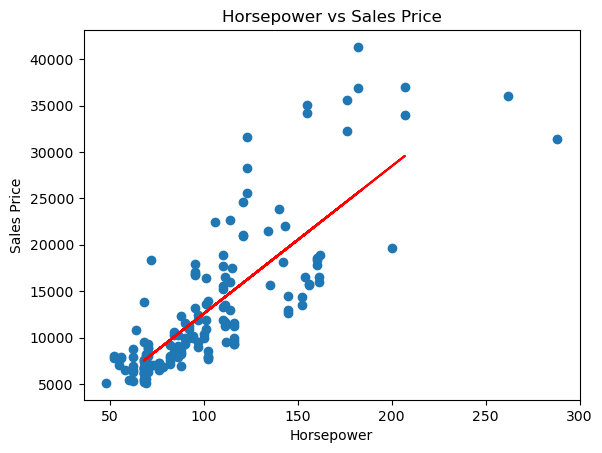

In [98]:
plt.scatter(x_train, y_train)
plt.plot(x_test, prediction, color="red")
plt.xlabel("Horsepower")
plt.ylabel("Sales Price")
plt.title("Horsepower vs Sales Price")
plt.show()

In [100]:
X = cars[['horsepower']]
y = cars['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (164, 1)
y_train shape: (164,)
X_test shape: (41, 1)
y_test shape: (41,)


In [101]:
print(f"Train accuracy {round(model.score(x_train,y_train)*100,2)} %")
print(f"Test accuracy {round(model.score(x_test,y_test)*100,2)} %")

Train accuracy -55.61 %
Test accuracy -52.76 %


# Three Conclusions

1]Majority of cars have horsepower between 50-150, and a sales price between 5000 - 20000, respectively.

2]As horsepower increases, sales price increases.

3]Majority of cars with over 200 horsepower have a sales price above 30000.